## Lab Assignment 3 Scientific Computing

Nick Boon & Marleen Rijksen

In [4]:
import numpy as np
from numba import jit

from scipy.sparse import spdiags 
from scipy.sparse.linalg import eigs
from scipy.linalg import eig

from scipy.sparse import diags

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize

## Schrödinger's equation

In [ ]:
@jit
def nabla_sq_1D(N):
    """
    Function which creates matrix containing the discretized nabla^2 
    operator.
    
    N = number of steps in domain
    """
    diagonals = [[1] * (N - 2) + [0], [1] + [-2] * (N - 2) + [1], [0] + [1] * (N - 2)]
    matrix = diags(diagonals, [-1, 0, 1]).toarray() 
    return matrix

### Infinite potential well

In [ ]:
N = 50 # number of steps
a = 1 # width of well (starts at x = 0)
dx = a/N

# create matrix and find eigenvectors/values
matrix = -0.5 * nabla_sq_1D(N) / (dx ** 2)
eigen = eigs(matrix, k=4, which='SM')

# find solution of certain state
state = 0
eigen_vec = eigen[1][:,state]
eigen_val = eigen[0][state]
print(((state + 1) ** 2 * np.pi ** 2)/ (2 * (a **2)))
print(eigen_val)

# x-axis contains values 0 to a in N steps
x_axis = np.linspace(0, a, N)
sol = np.array([np.sqrt(2 / a) * np.sin((state + 1) * np.pi * x / a) for x in x_axis])

# normalize
sol = normalize(sol.reshape(sol.shape[0],-1), norm='l2', axis=0).reshape(sol.shape)

# print(np.linalg.norm(sol))

# exact solution
plt.plot(x_axis, abs(sol) ** 2, label='exact')
plt.plot(x_axis, abs(eigen_vec) ** 2, label='numerical')
plt.xlabel('x')
plt.ylabel('$\Psi$')
plt.legend()

### Finite potential well

In [ ]:
def fin_well_discr(N, p, a, V0):
    """
    Function which creates matrix for finite well problem.
    
    N = number of steps in domain
    V0 is potential in the domain where V != 0 
    
    V = 0 for -a < x < a
    V = V0 for -p < x < -a and a < x < p 
    """
    
    # divide total length in N steps
    dX = 2 * p / N
    
    # boundary between V=V0 and V=0 
    boundary = int(abs(p-a)/dX)
    
    # create matrix 
    haha = -1 + V0
    diagonals = [[-0.5] * (N - 1), [1 + V0] * boundary + [1] * (N - 2 * boundary) + [1 + V0] * boundary, [-0.5] * (N - 1)]
    matrix = diags(diagonals, [-1, 0, 1]).toarray()
    return matrix

N = 100
a = 3
p = 7
V0 = 1
matrix = fin_well_discr(N, p, a, V0)
print(matrix)

eigen = eigs(matrix, k=1, which='SM')
state = 0

eigen_vec = eigen[1][:,state]
eigen_val = eigen[0][state]
print(eigen_val)

# x-axis contains values -a to a in N steps
x_axis = np.linspace(-p, p, N)

# plot line for well
plt.plot(x_axis, eigen_vec)
plt.axvline(x=a, c='red')
plt.axvline(x=-a, c='red')
plt.xlabel('x')
plt.ylabel('$\Psi$')

### Parabolic potential well

In [2]:
def parabolic_well_discr(N, a, b):
    """
    Function which creates matrix for parabolic well problem. 
    
    V = bx^2 (potential, x is position in domain)
    a = range of domain (from -a to a)
    N = number of steps in domain
    """
    
    # divide total domain in N steps
    dX = 2 * a / N
    
    # create middle diagonal (1 + V(x))
    diag = [(b * x ** 2 + 1/(dX ** 2)) for x in np.linspace(-a, a, N)]
    
    # create matrix 
    diagonals = [[-0.5 / (dX ** 2)] * (N - 1), diag, [-0.5 / (dX ** 2)] * (N - 1)]
    matrix = diags(diagonals, [-1, 0, 1]).toarray()
    return matrix

(0.501174603433+0j)
0.5
1.0
1.0


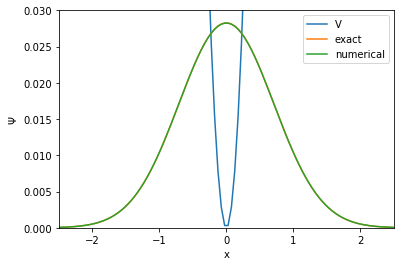

In [18]:
N = 400
a = 10
b = 1/2
matrix = parabolic_well_discr(N, a, b)
eigen = eigs(matrix, k=5, which='SM')
state = 0

eigen_vec = eigen[1][:,state]
eigen_val = eigen[0][state]

# x-axis contains values -a to a in N steps
x_axis = np.linspace(-a, a, N)

# exact solution for b = 1/2 and state = 0
sol = np.array([(1 / np.pi) ** (1 / 4) * np.exp((-1 * x ** 2) / 2) for x in x_axis])

# normalize
sol = normalize(sol.reshape(sol.shape[0],-1), norm='l2', axis=0).reshape(sol.shape)

print(eigen_val) # these should be equal for first state...
print((state + 1/2))

print(np.linalg.norm(sol)) # should both be normalized to 1..
print(np.linalg.norm(eigen_vec))

# plot line for well
plt.plot(x_axis, [b * (x ** 2) for x in x_axis], label='V')
plt.plot(x_axis, abs(sol) ** 2, label='exact')
plt.plot(x_axis, abs(eigen_vec ** 2), label='numerical')
plt.xlim(-a/4,a/4)
plt.ylim(0, 0.03)
plt.legend()
plt.xlabel('x')
plt.ylabel('$\Psi$')

In [ ]:
a = 2
N = 10
dX  = 2 * a / N
print(np.arange(-a, a, dX))
print(np.linspace(-a, a, N))